# OZNAL - Predspracovanie a výber atribútov
Miroslav Čulík, Andrej Gáfrik

1. **Opis problému, dát**
2. **Stručný opis prác iných autorov** - pochopenie prác iných autorov, ktorí riešia rovnaký problém je veľmi dôležitou súčasťou skúmania. Môžete sa z iných prác inšpirovať a poučiť. Práce citujte v texte a uveďte v zozname použitej literatúry.
3. **Predspracovanie a výber atribútov** - opis použitých metód a ich výsledky (aj slepé uličky)
4. **DM metódy** - opis použitých metód, alebo predpokladaný scenár použitia (je potrebné poznať DM metódy, ktoré plánujete použiť, aby ste vedeli, ako dáta predspracovať)
5. **Prvotné experimenty**
6. **Vyhodnocovanie** - čo budete vyhodnocovať, aké miery, grafy, kritériá použijete

TODOS:

- ~~**price** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom~~
- ~~**bedrooms** - manuálna úprava inštancie s hodnotou 33 na 3~~
- ~~**sqft_living** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom~~
- ~~**sqft_lot** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom~~
- ~~**sqft_above** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom~~
- ~~**sqft_basement** - transformácia pomocou odmocniny a nahradenie outlierov priemerom alebo odstránenie stĺpca~~
- ~~**sqft_living15** - transformácia pomocou logaritmu a nahradenie outlierov 5-95 percentilom~~
- ~~**sqft_lot15** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom~~
- chceme nejake atributy zmazať? ak ano, tak ake
~~Okrem zistení sme objavili 10 inštancií, ktoré majú hodnotu 0.0 pri počte kúpeľňového vybavenia v stĺpci `bathroom`, pričom až 7 z nich mám hodnotu počtu spální v atribúte `bedrooms` rovnú 0, zvyšné 3 majú hodnotu 1. Navrhujeme teda týchto 10 inštancií zmazať.~~

- ~~RMSLE nova metrika~~
- Outlieri - Popísať ako vznikli? Chybou, reálna hodnota
- ~~kodovanie kategorickych atributov (zipcode)- binary encoding, ...~~

- MSE, RMSE, RMSLE - podozrivo nízke hodnoty, inverzná transformácia pred počítaním metrík - je treba si zapamätať hodnotu pri boxcox ceny a nájsť inverznú funkciu
- ~~feature engineering - priemerná cena za sqft v rámci štvrti - nahradenie hodnoty zipcodu priemernou cenou za sqft v rámci štvrti - SELECT avg(price/sqft_lot) GROUPBY zipcode a replace namiesto zipcode - toto robiť iba pre TRAIN, v teste len doplňame, ak príde nejaká nová hodnota v teste, tak tu musíme replacnuť priemernou cenou na 1 sqft v ramci celeho datasetu~~
- feature engineering - urobit celkovu rozlohu (living+lot možno kombinacia s floors), pripadne vymysliet dalsie
- feature selection - Filter, wrapper, embedded - https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

- DM metody- co sme pouzili
- ~~ake metriky chceme - pridat dalsie~~
- komentare k notebooku
- clanok v LateXu (+fixnutie sablony)


## Otázky:

- je nutné, aby sme robili cross-validation?


## Opis problému, dát
Výber toho najdôležitejšieho z minulého reportu

## Stručný opis prác iných autorov

**Vedecké zdroje:**
1. [Housing Price Prediction Using Machine Learning Algorithms: The Case of Melbourne City, Australia](https://ieeexplore.ieee.org/document/8614000)
    - House Sales in Melbourne City dataset (31k riadkov, 21 stlpcov)
    - modely: 
        - Lineárna regresia 
        - Polynomiálna regresia
        - Regression Trees
        - Neuronová sieť
        - SVM
    - metriky: MSE
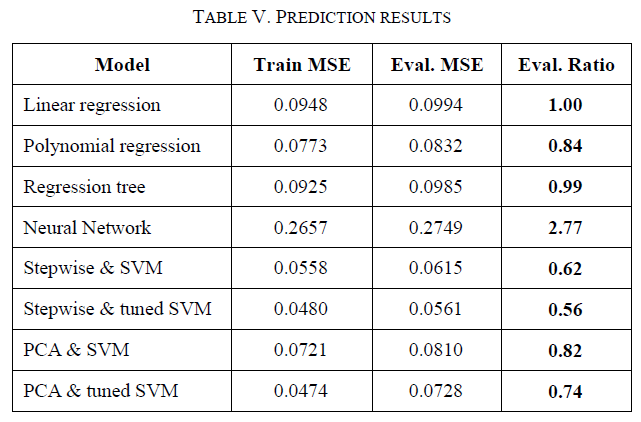
    

2. [Research on the Sustainable Development of UrbanHousing Price Based on Transport Accessibility:A Case Study of Xi’an, China](https://www.mdpi.com/2071-1050/12/4/1497)
    - modely: 
        - Random Forests(M3 - max_features=8, M4 - max_features=4)
    - metriky:
        - R^2
        - MSE
        
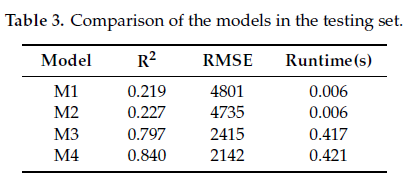

       
3. [A prediction comparison of housing sales prices by parametric versus semi-parametric regressions](https://www.sciencedirect.com/science/article/abs/pii/S105113770400004X)

**Nevedecké zdroje:**
1. https://towardsdatascience.com/regression-using-sklearn-on-kc-housing-dataset-1ac80ca3d6d4
    - rovnaký dataset ako používame my
    - modely:
        - lineárna regresia
        - viacnásobná regresia
        - polynomiálna regresia
    - metriky: R^2 
    
| Model         | R^2           |
|:-------------:|:-------------:|
| Jednoduchá lineárna regresia (sqft_living)     | 0.496 |
| Jednoduchá lineárna regresia (grade)     | 0.46 |
| Viacnásobná lineárna regresia (features1)     | 0.555     |
| Viacnásobná lineárna regresia (features2)     | 0.672    |
| Polynomiálna regresia(features1) - stupeň 2 | 0.759 |
| Polynomiálna regresia(features1) - stupeň 3 | 0.664 |

2. [Real Estate Price Prediction Using MachineLearning - Data Analytics Research Project](http://trap.ncirl.ie/3096/1/aswinsivamravikumar.pdf)

## Predspracovanie a výber atribútov

- **price** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom
- **bedrooms** - manuálna úprava inštancie s hodnotou 33 na 3
- **sqft_living** - transformácia pomocou logaritmu a nahradenie outlierov 5-95 percentilom
- **sqft_lot** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom
- **sqft_above** - transformácia pomocou boxcox transformácie a nahradenie outlierov 5-95 percentilom
- **sqft_basement** - transformácia pomocou odmocniny a nahradenie outlierov priemerom alebo odstránenie stĺpca
- **sqft_living15** - transformácia pomocou logaritmu a nahradenie outlierov 5-95 percentilom
- **sqft_lot15** - transformácia pomocou boxcox transformácie a nahradenie outlierov mediánom

Okrem zistení sme objavili 10 inštancií, ktoré majú hodnotu 0.0 pri počte kúpeľňového vybavenia v stĺpci `bathroom`, pričom až 7 z nich mám hodnotu počtu spální v atribúte `bedrooms` rovnú 0, zvyšné 3 majú hodnotu 1. Navrhujeme teda týchto 10 inštancií zmazať.

In [1]:
cd ..

C:\Users\Andrej\Desktop\OZNAL\oznal_project


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.special import inv_boxcox
from matplotlib import pyplot as plt
from dateutil.parser import parse

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn import metrics

from src import analysis
from src import preprocessing2

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
path_housing = "data\\kc_house_data.csv"
df = pd.read_csv(path_housing, sep=",")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [4]:
X_train, X_valid, X_test, y_train, y_valid, y_test, price_lambda = preprocessing2.run_pipeline(df)

In [5]:
df_try1 = X_train.copy()
df_try1['price'] = y_train

df_try2 = X_valid.copy()
df_try2['price'] = y_valid

df_try3 = X_test.copy()
df_try3['price'] = y_test

df_try = pd.concat([df_try1, df_try2, df_try3])
# df_try = df_try.drop(columns=['zipcode_0'])
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21606 entries, 12496 to 16594
Data columns (total 30 columns):
id                21606 non-null int64
date              21606 non-null datetime64[ns]
bedrooms          21606 non-null int64
bathrooms         21606 non-null float64
sqft_living       21606 non-null float64
sqft_lot          21606 non-null float64
floors            21606 non-null float64
waterfront        21606 non-null int64
view              21606 non-null int64
condition         21606 non-null int64
grade             21606 non-null int64
sqft_above        21606 non-null float64
sqft_basement     21606 non-null float64
yr_built          21606 non-null int64
yr_renovated      21606 non-null int64
zipcode_0         21606 non-null int64
zipcode_1         21606 non-null int64
zipcode_2         21606 non-null int64
zipcode_3         21606 non-null int64
zipcode_4         21606 non-null int64
zipcode_5         21606 non-null int64
zipcode_6         21606 non-null int64
zipcode_

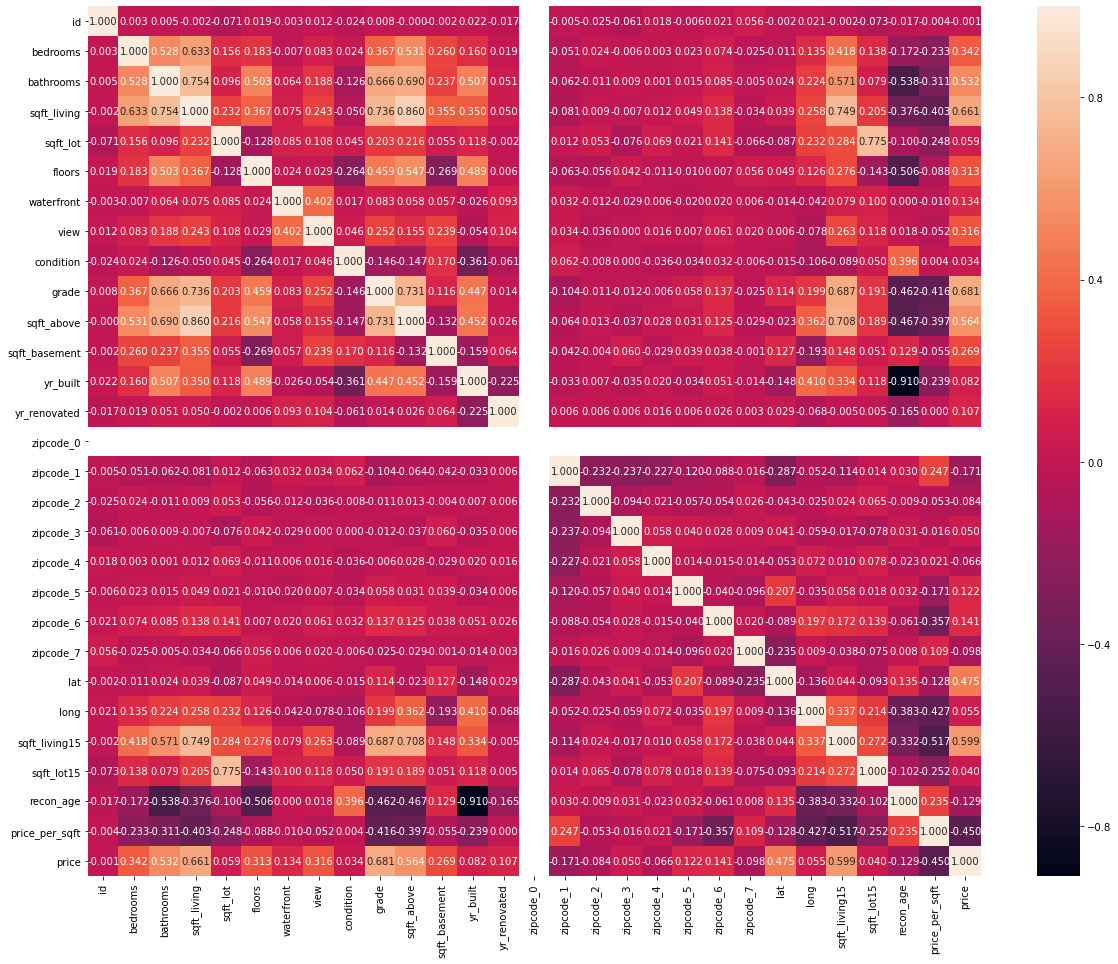

In [6]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(df_try.corr(), ax=ax, annot=True, fmt=".3f")
# df_try.corr()

In [7]:
df['sqft_living'].mean()

2079.8997362698374

In [8]:
df['sqft_living'].quantile(0.95)

3760.0

## DM metódy

1. Lineárna regresia
 - jednoduchá
 - viacnásobná
 
2. Polynomiálna regresia
 - stupeň 2
 - stupeň 3

3. Decission Tree Regression / Regression Tree
4. Support Vector Regression (SVR)
5. Random Forest

## Prvotné experimenty

### Jednoduchá lineárna regresia - sqft_living

In [9]:
reg=linear_model.LinearRegression()
x_train=np.array(X_train['sqft_living']).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(X_valid['sqft_living']).reshape(-1,1)
y_test=np.array(y_valid).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')

mean_squared_error=metrics.mean_squared_error(inv_boxcox(y_test, price_lambda),inv_boxcox(pred, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(y_test, price_lambda), inv_boxcox(pred, price_lambda))

r2_train = reg.score(x_train,y_train)
r2_test = reg.score(x_test,y_test)
adj_r2_train = 1 - (((1 - r2_train) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 5))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Mean Squared Error 60379753642.67178
Root Mean Squared Error 245722.92047
Root Mean Squared Log Error 0.39115
R squared training 0.451
R squared testing 0.402
Adjusted-R squared training 0.451
Adjusted-R squared testing 0.402
intercept [3.78442207]
coefficient [[0.02965959]]


### Jednoduchá lineárna regresia - grade

In [10]:
reg=linear_model.LinearRegression()
x_train=np.array(X_train['grade']).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(X_valid['grade']).reshape(-1,1)
y_test=np.array(y_valid).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')

mean_squared_error=metrics.mean_squared_error(inv_boxcox(y_test, price_lambda),inv_boxcox(pred, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(y_test, price_lambda),inv_boxcox(pred, price_lambda))

r2_train = reg.score(x_train,y_train)
r2_test = reg.score(x_test,y_test)
adj_r2_train = 1 - (((1 - r2_train) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 5))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

linear model
Mean Squared Error 55001939903.94096
Root Mean Squared Error 234524.92384
Root Mean Squared Log Error 0.38054
R squared training 0.477
R squared testing 0.432
Adjusted-R squared training 0.477
Adjusted-R squared testing 0.432
intercept [3.93205218]
coefficient [[0.01344416]]


### Viacnásobná lineárna regresia

In [11]:
features1 = preprocessing2.select_features(X_train, y_train, linear_model.LinearRegression) 

reg=linear_model.LinearRegression()
reg.fit(X_train[features1],y_train)

pred=reg.predict(X_valid[features1])

print('multiple linear regression 1')
mean_squared_error=metrics.mean_squared_error(inv_boxcox(y_valid, price_lambda),inv_boxcox(pred, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(y_valid, price_lambda),inv_boxcox(pred, price_lambda))

r2_train = reg.score(X_train[features1],y_train)
r2_test = reg.score(X_valid[features1],y_valid)
adj_r2_train = 1 - (((1 - r2_train) * (X_train[features1].shape[0] - 1)) / (X_train[features1].shape[0] - X_train[features1].shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (X_valid[features1].shape[0] - 1)) / (X_valid[features1].shape[0] - X_valid[features1].shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 5))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))

print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

multiple linear regression 1
Mean Squared Error 34944367428.43664
Root Mean Squared Error 186934.12591
Root Mean Squared Log Error 0.25884
R squared training 0.781
R squared testing 0.744
Adjusted-R squared training 0.781
Adjusted-R squared testing 0.744
Intercept:  [1.48311087]
Coefficient: [[ 1.51482623e-02  3.41215946e-03  3.78452993e-03  2.31928488e-03
   7.04038947e-03 -1.43355076e-04 -2.82001549e-03  5.83690344e-02
  -2.81136532e-02 -1.12521301e+01]]


### Viacnásobná lineárna regresia - part2

In [12]:
features2 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']
reg=linear_model.LinearRegression()
reg.fit(X_train[features2],y_train)

pred=reg.predict(X_valid[features2])

print('complex_model 2')
mean_squared_error=metrics.mean_squared_error(inv_boxcox(y_test, price_lambda),inv_boxcox(pred, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(y_test, price_lambda),inv_boxcox(pred, price_lambda))

r2_train = reg.score(X_train[features2],y_train)
r2_test = reg.score(X_valid[features2],y_valid)
adj_r2_train = 1 - (((1 - r2_train) * (X_train[features2].shape[0] - 1)) / (X_train[features2].shape[0] - X_train[features2].shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (X_valid[features2].shape[0] - 1)) / (X_valid[features2].shape[0] - X_valid[features2].shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 5))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))

print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

complex_model 2
Mean Squared Error 36472708143.15429
Root Mean Squared Error 190978.29233
Root Mean Squared Log Error 0.27944
R squared training 0.736
R squared testing 0.704
Adjusted-R squared training 0.736
Adjusted-R squared testing 0.703
Intercept:  [0.65803596]
Coefficient: [[-6.55531794e-04 -3.82822926e-04  1.29298561e-02 -2.17486094e-02
   1.12249895e-04  1.01926527e-02  3.34321895e-03  5.88036290e-03
   1.09690458e-02  8.46005158e-05  6.73535174e-02  9.86728393e-03]]


### Polynomiálna regresia 2. stupňa

In [13]:
features1 = preprocessing2.select_features(X_train, y_train, linear_model.LinearRegression)

polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(X_train[features1])
xvalid_poly=polyfeat.fit_transform(X_valid[features1])
np_y_train = np.array(y_train).reshape(-1,1)

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,np_y_train)
polypred=poly.predict(xvalid_poly)

print('Complex Model_3')
mean_squared_error=metrics.mean_squared_error(inv_boxcox(y_valid, price_lambda),inv_boxcox(polypred, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(y_valid, price_lambda),inv_boxcox(polypred, price_lambda))

r2_train = poly.score(xtrain_poly, np.array(y_train).reshape(-1,1))
r2_test = poly.score(xvalid_poly, np.array(y_valid).reshape(-1,1))
adj_r2_train = 1 - (((1 - r2_train) * (X_train[features1].shape[0] - 1)) / (X_train[features1].shape[0] - X_train[features1].shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (X_valid[features1].shape[0] - 1)) / (X_valid[features1].shape[0] - X_valid[features1].shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 5))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))

Complex Model_3
Mean Squared Error 25599854129.10427
Root Mean Squared Error 159999.54415
Root Mean Squared Log Error 0.23187
R squared training 0.828
R squared testing 0.789
Adjusted-R squared training 0.828
Adjusted-R squared testing 0.789


### Polynomiálna regresia 3. stupňa

In [35]:
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(X_train[features1])
xvalid_poly=polyfeat.fit_transform(X_valid[features1])
np_y_train = np.array(y_train).reshape(-1,1)

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,np_y_train)
polypred=poly.predict(xvalid_poly)

print('Complex Model_4')
mean_squared_error=metrics.mean_squared_error(inv_boxcox(y_valid, price_lambda),inv_boxcox(polypred, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(y_valid, price_lambda),inv_boxcox(polypred, price_lambda))

r2_train = poly.score(xtrain_poly, np.array(y_train).reshape(-1,1))
r2_test = poly.score(xvalid_poly, np.array(y_valid).reshape(-1,1))
adj_r2_train = 1 - (((1 - r2_train) * (X_train[features1].shape[0] - 1)) / (X_train[features1].shape[0] - X_train[features1].shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (X_valid[features1].shape[0] - 1)) / (X_valid[features1].shape[0] - X_valid[features1].shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 5))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),5))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),5))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))

Complex Model_4


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Regresný rozhodovací strom

In [16]:
# features3 = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','long','sqft_living15', 'recon_age']
features3 = list(X_train.columns)
features3.remove('date')
regr_1 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train[features3], y_train)

y_1 = regr_1.predict(X_valid[features3])
mean_squared_error=metrics.mean_squared_error(inv_boxcox(y_valid, price_lambda),inv_boxcox(y_1, price_lambda))
rmlse = metrics.mean_squared_log_error(inv_boxcox(y_valid, price_lambda), inv_boxcox(y_1, price_lambda))

r2_train = regr_1.score(X_train[features3], y_train)
r2_test = regr_1.score(X_valid[features3], y_valid)
adj_r2_train = 1 - (((1 - r2_train) * (X_train[features3].shape[0] - 1)) / (X_train[features3].shape[0] - X_train[features3].shape[1] - 1))
adj_r2_test = 1 - (((1 - r2_test) * (X_valid[features3].shape[0] - 1)) / (X_valid[features3].shape[0] - X_valid[features3].shape[1] - 1))

print('Mean Squared Error', round(mean_squared_error, 2))
print('Root Mean Squared Error', round(np.sqrt(mean_squared_error),2))
print('Root Mean Squared Log Error', round(np.sqrt(rmlse),2))
print('R squared training',round(r2_train,3))
print('R squared testing',round(r2_test,3))
print('Adjusted-R squared training', round(adj_r2_train,3))
print('Adjusted-R squared testing', round(adj_r2_test,3))

print(price_lambda)

Mean Squared Error 23741104475.49
Root Mean Squared Error 154081.49
Root Mean Squared Log Error 0.23
R squared training 0.861
R squared testing 0.802
Adjusted-R squared training 0.861
Adjusted-R squared testing 0.801
-0.2363775890937908


## Vyhodnocovanie

Metriky:
- Mean Square Error (MSE)
- Root Mean Square Error (RMSE)
- Root Mean Squared Log Error (RMSLE)
- R-squared
- Adjusted R-squared